In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import seaborn as sns

In [3]:
wines = pd.read_csv('winemag-data-130k-v2.csv')
wines.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Pregunta 1

Realizasentimentanalysisde la columna “description” con la libreríavadery crea cuatro columnas nuevas que correspondan a cada
dimensión de sentimiento (neg, pos,neu,compound)

In [4]:
analizer = SentimentIntensityAnalyzer()
sentence = "I love this fucking job"
vs = analizer.polarity_scores(sentence)
scores = [analizer.polarity_scores(x) for x in wines['description']]
## wines['neg'] = wines['description'].apply(lambda x: x)
## wines.head()
scores

[{'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'compound': 0.1531},
 {'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.6486},
 {'neg': 0.053, 'neu': 0.947, 'pos': 0.0, 'compound': -0.128},
 {'neg': 0.0, 'neu': 0.926, 'pos': 0.074, 'compound': 0.34},
 {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.8176},
 {'neg': 0.0, 'neu': 0.96, 'pos': 0.04, 'compound': 0.1655},
 {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.6369},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.586, 'pos': 0.414, 'compound': 0.9091},
 {'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.7506},
 {'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compound': 0.8176},
 {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.4939},
 {'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.5574},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.032, 'neu': 0.923, 'pos': 0.045, 'compound': 0.1624},
 {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.7506},
 {'neg': 0

In [5]:
new_cols = ['neg', 'pos', 'neu', 'compound']
for col in new_cols:
    wines[col] = [x[col] for x in scores]
wines.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,neg,pos,neu,compound
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0.000,0.065,0.935,0.1531
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0.000,0.132,0.868,0.6486
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0.053,0.000,0.947,-0.1280
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0.000,0.074,0.926,0.3400
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0.000,0.195,0.805,0.8176


## Pregunta 2

Crea otra columna llamada “Length” que contenga el número de palabras contenidas en la columna “description”

In [6]:
wines['Length'] = wines['description'].apply(lambda x: len(x.split()))
wines.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,neg,pos,neu,compound,Length
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0.000,0.065,0.935,0.1531,24
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0.000,0.132,0.868,0.6486,38
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0.053,0.000,0.947,-0.1280,28
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0.000,0.074,0.926,0.3400,33
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0.000,0.195,0.805,0.8176,41


## Pregunta 3

Grafica un heatmap con las correlaciones entre neg, pos, neu,compound, Length, priceypoints

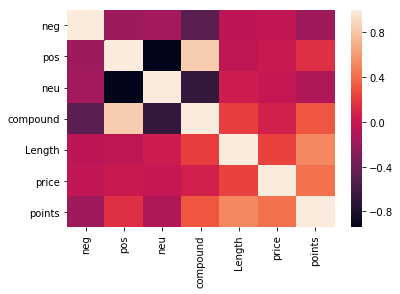

In [7]:
sns.heatmap(wines[['neg', 'pos', 'neu', 'compound', 'Length', 'price', 'points']].corr())

## Pregunta 4

¿Cuáles variables muestran mayor correlación?

Las variables que muestran mayor correlación son:
- compound con pos
- points con Length
- price con points
- compound con points
- compound con Length
- pos con points

## Pregunta 5

Normaliza ‘Length’, ‘Price’ y ‘points’ , ‘neg’, ‘pos’ en el rango [0,1] y grafica los scatter plots de todos ellos (todos contra todos)

In [8]:
df = wines.copy()
def normalize(col):
    return (col-col.min())/(col.max()-col.min())
df['Length'] = normalize(df['Length'])
df['price'] = normalize(df['price'])
df['points'] = normalize(df['points'])
df['neg'] = normalize(df['neg'])
df['pos'] = normalize(df['pos'])
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,neg,pos,neu,compound,Length
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,0.35,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0.000000,0.105008,0.935,0.1531,0.159091
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,0.35,0.003337,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0.000000,0.213247,0.868,0.6486,0.265152
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,0.35,0.003034,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0.104126,0.000000,0.947,-0.1280,0.189394
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,0.35,0.002731,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0.000000,0.119548,0.926,0.3400,0.227273
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,0.35,0.018507,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0.000000,0.315024,0.805,0.8176,0.287879


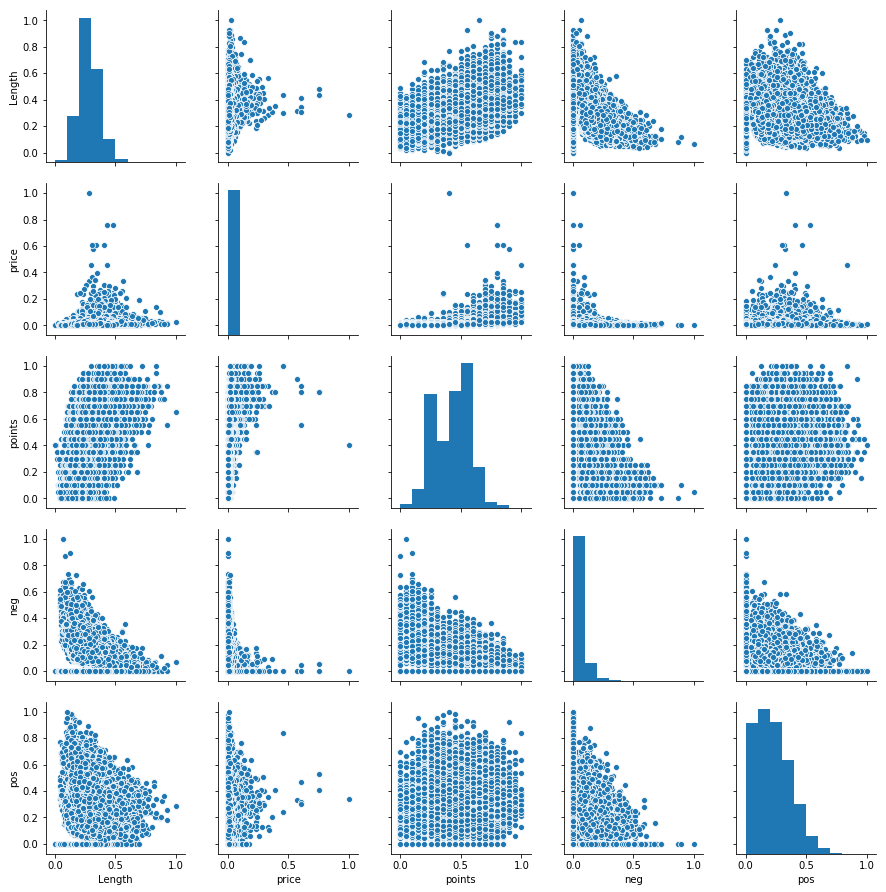

In [63]:
sns.pairplot(df[['Length', 'price', 'points', 'neg', 'pos']])

## Pregunta 6

¿Cuáles son las dos variedades con mejor puntaje (points) y cuales son las dos variades con peor puntaje?

In [37]:
points_ordering = wines[['variety', 'points']].groupby('variety').mean().sort_values(by=['points'])
points_ordering.head(3)

,points
variety,
Chancellor,80.500000
Airen,81.666667
Shiraz-Tempranillo,82.000000


In [38]:
## Mejor puntaje:
points_ordering.iloc[-2:]

,points
variety,
Tinta del Pais,95.0
Terrantez,95.0


In [39]:
## Peor puntaje:
points_ordering.iloc[:2]

,points
variety,
Chancellor,80.500000
Airen,81.666667


## Pregunta 7

Grafica el histograma de precios de la variedad Tempranillo y de la variedad Chardonnay

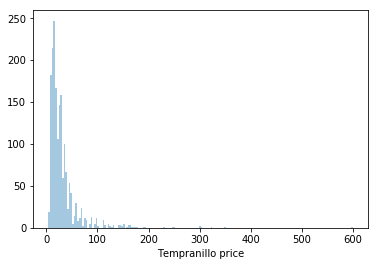

In [64]:
## Histograma de Tempranillo
tempranillo_prices = wines[wines['variety'] == 'Tempranillo']['price']
sns.distplot(tempranillo_prices, bins=180, kde=False, axlabel='Tempranillo price')

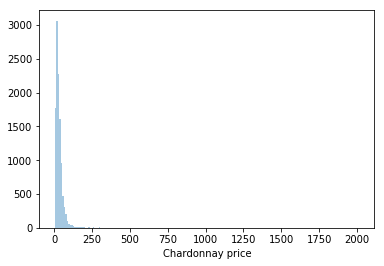

In [65]:
## Histograma de Tempranillo
chardonnay_prices = wines[wines['variety'] == 'Chardonnay']['price']
sns.distplot(chardonnay_prices, bins=200, kde=False, axlabel='Chardonnay price')

## Pregunta 8

Haz un barplot de estas variedades y su precio promedio: Chardonnay, Syrah, Merlot, Tempranillo, Zinfandel y Pinot Noir

[Text(0, 0.5, 'mean prices')]

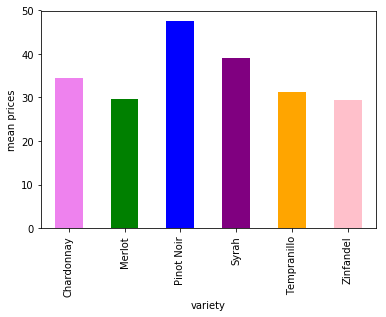

In [129]:
selected_wines = wines[wines['variety'].isin(['Chardonnay','Syrah','Merlot','Tempranillo','Zinfandel', 'Pinot Noir'])]
ax = selected_wines[['variety', 'price']].groupby('variety').mean()['price'].plot.bar(colors=['violet','green','blue','purple', 'orange', 'pink'])
ax.set(ylabel="mean prices")

## Pregunta 9

Haz un barplot de estas variedades y su puntaje promedio: Chardonnay, Syrah, Merlot, Tempranillo, Zinfandel y PinotNoir

[Text(0, 0.5, 'mean points')]

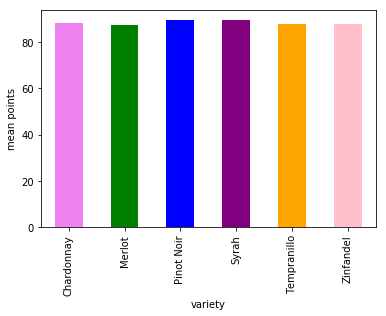

In [130]:
ax = selected_wines[['variety', 'points']].groupby('variety').mean()['points'].plot.bar(colors=['violet','green','blue','purple', 'orange', 'pink'])
ax.set(ylabel="mean points")

## Pregunta 10

¿Cuál es la provincia con los vinos mejores calificados en promedio?

In [151]:
best_wines = wines[['province','points']].groupby('province').mean().sort_values(by=['points'])
print('La provincia con vinos mejores calificados en promedio es', best_wines.iloc[-1].name)

La provincia con vinos mejores calificados en promedio es Südburgenland


## Pregunta 11

¿Cuál es la provincia con los vinos más caros en promedio?

In [152]:
expensive_wines = wines[['province','price']].dropna().groupby('province').mean().sort_values(by=['price'])
print('La provincia con vinos más caros en promedio es', expensive_wines.iloc[-1].name)

La provincia con vinos más caros en promedio es Colares


## Pregunta 12

La variable ‘designation’ tiene varios datos perdidos. ¿Cómo tratarías esos datos?

- Si no la estoy usando, (puede no ser muy importante), decidiría ignorar la variable
- En caso de que sí se necesite la variable, trataría a los datos perdidos como una nueva categoría debido al tipo de variable.
- Podría reemplazarlas por el valor más común de la región en donde se encuentran.

## Pregunta 13

¿Cuáles son las 5 palabras más comunes de la descripción de los vinos en el cuartil q3 de puntos y en el cuartil q3 de precio?

In [224]:
cat, points_bins = pd.qcut(x=wines['points'], q=4, retbins=True)
cat, price_bins = pd.qcut(x=wines['price'], q=4, retbins=True)
points_third_quartile = points_bins[3]
price_third_quartile = price_bins[3]

In [225]:
wines2 = wines[['description', 'price', 'points']]
considered_descriptions = wines2[(wines2['price'] > price_third_quartile) & (wines2['points'] > points_third_quartile)]['description']
considered_descriptions.head()

119    Medium-gold in color. Complex and inviting nos...
120    Slightly backward, particularly given the vint...
124    This sophisticated wine is mostly Cabernet Sau...
283    Bella Vida replaces the Abbey Ridge bottling a...
284    This huge Malbec defines jammy and concentrate...
Name: description, dtype: object

In [248]:
import operator
def five_most_common_words(descriptions=[]):
    word_frequency = {}
    for description in descriptions:
        for word in description.split():
            if word not in word_frequency:
                word_frequency[word] = 1
            else:
                word_frequency[word]+=1
    sorted_d = sorted(word_frequency.items(), key=operator.itemgetter(1))
    return [x for x, y in sorted_d[-5:]]

In [253]:
print('Las 5 palabras más comunes en la pregunta 13 son ', five_most_common_words(considered_descriptions))

Las 5 palabras más comunes en la pregunta 13 son  ['with', 'a', 'of', 'the', 'and']


## Pregunta 14

¿Cuáles son las 5 palabras más comunes de la descripción de los vinos en el cuartil q1 de puntos y en el cuartil q3 de precio?

In [250]:
points_first_quartile = points_bins[0]
points_second_quartile = points_bins[1]

In [251]:
new_considered_descriptions = wines2[(wines2['price'] > price_third_quartile) & (wines2['points'] > points_first_quartile) & (wines2['points'] <= points_second_quartile)]['description']
new_considered_descriptions.head()

33    Rustic and dry, this has flavors of berries, c...
35    As with many of the Erath 2010 vineyard design...
59    Aromas of cranberry, barrel spice and herb are...
60    Syrupy and dense, this wine is jammy in plum a...
63    This fat, yeasty Champagne is comprised predom...
Name: description, dtype: object

In [255]:
print('Las 5 palabras más comunes en la pregunta 14 son ', five_most_common_words(new_considered_descriptions))

Las 5 palabras más comunes en la pregunta 14 son  ['with', 'of', 'a', 'the', 'and']
